# Import packages

To run this demo, firstly we are going to import necessary packages.

- If you clone the github repo and want to run the `flowsom` script locally, please only run the following first block.
- If you use `pip install FlowSom` and want to run `FlowSom` package, please only run the following second block. 

In [1]:
# For running the flowsom script locally
import sys
sys.path.append('../script/')
from cluster import *
from flowsom import *

%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# For running the FlowSom PYPI package
from flowsom import flowsom as flowsom

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Read data file

Read the fcs file into dataframe
    - the varian fcs data has a column of time which was dropped in the function

In [2]:
tt = flowsom('flowmetry_transformed.csv', if_fcs=False, if_drop=True, drop_col=['Unnamed: 0'])

In [3]:
sample_df = tt.df # fetch the dataframe
sample_df.head()

,FSC-H,FSC-A,SSC-H,SSC-A,FITC-H,FITC-A,PerCP-H,PerCP-A,APC-H,APC-A,...,Violet660-A,PE-H,PE-A,ECD-H,ECD-A,PC5.5-H,PC5.5-A,PC7-H,PC7-A,FSC-Width
0,7039.830078,7350.754883,6914.665039,7143.382324,2384.100342,2923.956543,3316.022949,3890.987305,5105.169922,5471.793945,...,5199.046875,1046.402954,248.007675,982.118774,809.595032,3014.713867,3250.576660,1053.145630,-11.021868,6512.998047
1,7161.020508,7499.615723,6740.579102,6971.214355,4141.513672,4566.927246,3078.641357,3442.689453,4043.531494,4294.428711,...,296.928375,1026.433350,628.823059,1127.449707,742.617920,886.213440,539.116089,545.685364,-232.061172,6650.244629
2,7855.335938,8117.546875,7728.762695,7939.698730,5178.771484,5458.612793,5260.320312,5593.743652,4910.125977,5355.188965,...,3934.820068,1687.885864,955.872498,2248.828857,1546.624146,2902.313477,2970.763428,1268.558960,1418.495850,6281.499512
3,7058.884277,7457.745605,6981.489258,7226.314453,1921.842896,2071.072754,2732.886230,3060.397705,4333.129395,4719.669922,...,652.316162,1047.751587,551.159180,878.885559,-105.218506,972.110413,381.780243,1017.252686,1134.167480,6921.572266
4,6751.519531,7130.738770,6954.334961,7195.149414,2163.501709,2632.426514,3994.721924,4246.228027,5050.436523,5456.137207,...,5244.836426,1270.159058,440.211151,1057.729492,636.200134,2493.170654,1960.032593,808.234985,321.927002,6820.718750


# Perform Self Organized Mapping

In [4]:
"""
som_mapping(self, x_n, y_n, d, sigma, lr,batch_size, 
                    neighborhood='gaussian', 
                    tf_str=None, if_fcs=True,
                    seed=10):

        Perform SOM on transform data
        x_n: e.g. 100, the dimension of expected map
        y_n: e.g. 100, the dimension of expected map
        d: e.g. 31, vector length of input df
        sigma: e.g 2.5, the sigma of initialized weights
        lr: e.g 0.1, learning rate
        batch_size: 1000, iteration times
        neighborhood: 'gaussian', the initialized weights' distribution
        tf_str : string
                 tranform parameters, go check self.tf()
                 e.g. None, 'hlog' - the transform algorithm
        if_fcs : bool
                 tranform parameters, go check self.tf()
                 whethe the imput file is fcs file. If not, it should be a csv file
                 only the fcs file could be transformed
                 if it is a csv file, you have to make your own transform function   
        seed: for reproducing
"""

tt.som_mapping(50, # x_n: e.g. 100, the dimension of expected map
               50, # y_n: e.g. 100, the dimension of expected map
               31, # d: e.g. 31, vector length of input df
               2.5, # sigma: e.g 2.5, the sigma of initialized weights
               0.1, # lr: e.g 0.1, learning rate
               500, # batch_size: 1000, iteration times
               # neighborhood='gaussian', the initialized weights' distribution
               tf_str=None, # string, e.g. hlog', None, etc - the transform algorithm
               if_fcs=False # bool, whethe the imput file is fcs file. If not, it should be a csv file
               # seed = 10, for reproducing
              ) 

/mnt/c/Users/cdl4549/varian/code/cluster/flowSOM.py:81: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  self.tf_matrix = self.df.as_matrix()


Training...
 [ 500 / 500 ] 100% 0.02579 it/s
...ready!


## Visualization of the distance map of SOM

     - a 100 * 100 map in this case

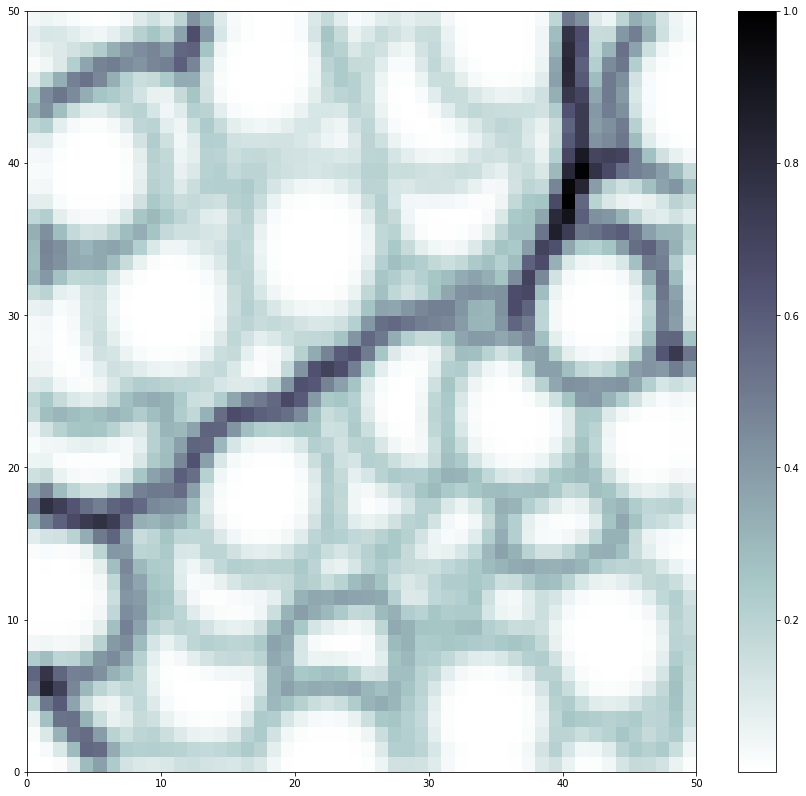

In [5]:
som_output_weights = tt.map_som # SOM outputs
som_distance_map = tt.map_som.distance_map() # distance map of SOM

plt.figure(figsize=(15, 14))
plt.pcolor(som_distance_map, cmap='bone_r')
plt.colorbar()
# plt.savefig('som.png')

# Perform meta clustering and visualization
 on 50 * 50 vectors from SOM

In [13]:
tt.meta_clustering(AgglomerativeClustering, #  cluster_class: e.g. KMeans, a cluster class, like "from sklearn.cluster import KMeans"
                   8, # min_n: e.g. 10, the min proposed number of clusters
                   25, # max_n: e.g. 31, the max proposed number of clusters
                   3, # iter_n: e.g 10, the iteration times for each number of clusters
                   resample_proportion=0.6, # resample_proportion: e.g 0.6, the proportion of re-sampling when computing clustering
                   verbose=True #verbose: e.g. False, whether print out the clustering process
                  )

At k = 8, aka. iteration = 0
	At resampling h = 0, (k = 8)
	At resampling h = 1, (k = 8)
	At resampling h = 2, (k = 8)
At k = 9, aka. iteration = 1
	At resampling h = 0, (k = 9)
	At resampling h = 1, (k = 9)
	At resampling h = 2, (k = 9)
At k = 10, aka. iteration = 2
	At resampling h = 0, (k = 10)
	At resampling h = 1, (k = 10)
	At resampling h = 2, (k = 10)
At k = 11, aka. iteration = 3
	At resampling h = 0, (k = 11)
	At resampling h = 1, (k = 11)
	At resampling h = 2, (k = 11)
At k = 12, aka. iteration = 4
	At resampling h = 0, (k = 12)
	At resampling h = 1, (k = 12)
	At resampling h = 2, (k = 12)
At k = 13, aka. iteration = 5
	At resampling h = 0, (k = 13)
	At resampling h = 1, (k = 13)
	At resampling h = 2, (k = 13)
At k = 14, aka. iteration = 6
	At resampling h = 0, (k = 14)
	At resampling h = 1, (k = 14)
	At resampling h = 2, (k = 14)
At k = 15, aka. iteration = 7
	At resampling h = 0, (k = 15)
	At resampling h = 1, (k = 15)
	At resampling h = 2, (k = 15)
At k = 16, aka. iteratio

In [14]:
tt.bestk # the best number of clusters within the range of (min_n, max_n)

10

Visualize the meta clustering with minimal spanning tree

10


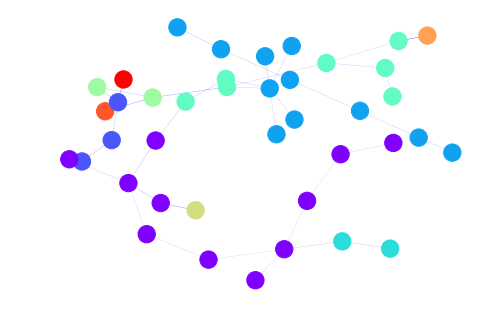

In [15]:
tt.vis(t=4, # the number of total nodes = t * bestk
       edge_color='b', 
       node_size=300, 
       with_labels=False)
# plt.savefig('mst.png')

# Make prediction

In [16]:
# categorize all the samples from fcs file 
tt.labeling()

0 samples done...
10000 samples done...


Have a look at the output dataframe

In [17]:
output_df = tt.df # new column added: category
output_tf_df = tt.tf_df # new column added: category

In [18]:
output_df.head()

,FSC-H,FSC-A,SSC-H,SSC-A,FITC-H,FITC-A,PerCP-H,PerCP-A,APC-H,APC-A,...,PE-H,PE-A,ECD-H,ECD-A,PC5.5-H,PC5.5-A,PC7-H,PC7-A,FSC-Width,category
0,7039.830078,7350.754883,6914.665039,7143.382324,2384.100342,2923.956543,3316.022949,3890.987305,5105.169922,5471.793945,...,1046.402954,248.007675,982.118774,809.595032,3014.713867,3250.576660,1053.145630,-11.021868,6512.998047,0
1,7161.020508,7499.615723,6740.579102,6971.214355,4141.513672,4566.927246,3078.641357,3442.689453,4043.531494,4294.428711,...,1026.433350,628.823059,1127.449707,742.617920,886.213440,539.116089,545.685364,-232.061172,6650.244629,2
2,7855.335938,8117.546875,7728.762695,7939.698730,5178.771484,5458.612793,5260.320312,5593.743652,4910.125977,5355.188965,...,1687.885864,955.872498,2248.828857,1546.624146,2902.313477,2970.763428,1268.558960,1418.495850,6281.499512,6
3,7058.884277,7457.745605,6981.489258,7226.314453,1921.842896,2071.072754,2732.886230,3060.397705,4333.129395,4719.669922,...,1047.751587,551.159180,878.885559,-105.218506,972.110413,381.780243,1017.252686,1134.167480,6921.572266,4
4,6751.519531,7130.738770,6954.334961,7195.149414,2163.501709,2632.426514,3994.721924,4246.228027,5050.436523,5456.137207,...,1270.159058,440.211151,1057.729492,636.200134,2493.170654,1960.032593,808.234985,321.927002,6820.718750,0


In [20]:
np.unique(output_df.category)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Visualize each cluster

Compute the mean feature for each class

In [21]:
mmm = output_tf_df.groupby(['category']).mean()

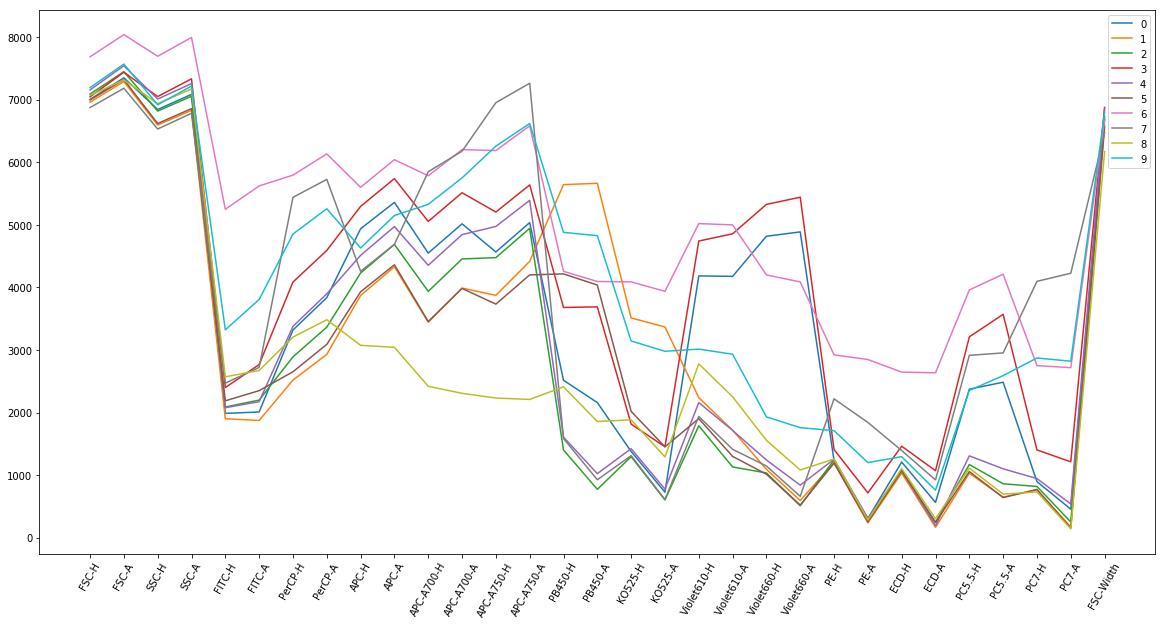

In [22]:
plt.figure(figsize=(20,10))
x = [i for i in range(31)]
my_xticks = mmm.columns
plt.xticks(x, my_xticks)
for i in range(len(mmm)):
    plt.plot(x, mmm.iloc[i])
plt.xticks(rotation=60)
plt.legend()
plt.show()

In [23]:
# Select interested columns
cols_s = [
    "FSC-A",
    "SSC-A",
    "APC-A750-A",
    "Violet660-A",
    "PB450-A",
    "FITC-A",
    "PE-A",
    "APC-A"
]

select_df = mmm[cols_s]

 Visualize the selected columns

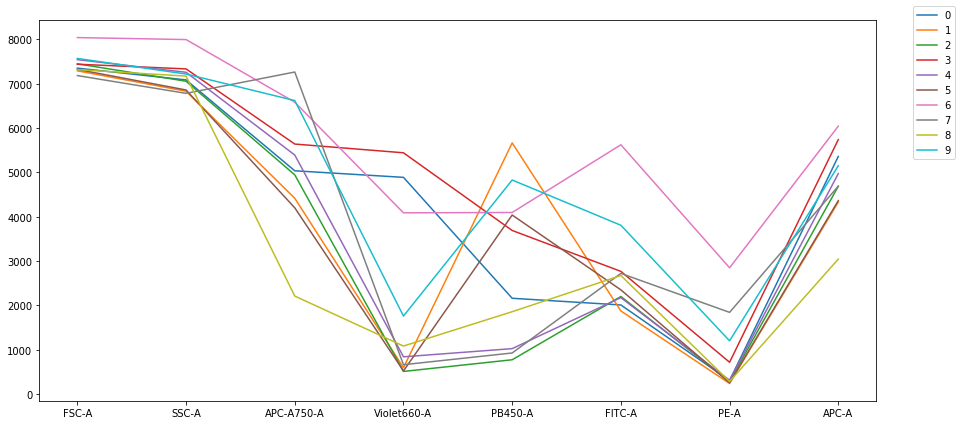

In [24]:
plt.figure(figsize=(15,7))
x = [i for i in range(len(select_df.columns))]
my_xticks = select_df.columns
plt.xticks(x, my_xticks)
for i in range(len(mmm)):
    plt.plot(x, select_df.iloc[i])
#plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

Compute the percentage of each cluster

In [25]:
cate_list = []
count_list = []
percent_list = []

base = len(output_tf_df)
for i in np.unique(output_tf_df.category):
    cate_list.append(i)
    c = len(output_tf_df[output_tf_df['category'] == i] )
    p  = c/base
    count_list.append(c)
    percent_list.append(p)

count_df = pd.DataFrame({'category':cate_list, 'count':count_list, 'percentage':percent_list})

In [26]:
count_df.head()

,category,count,percentage
0,0,4711,0.314067
1,1,1400,0.093333
2,2,3459,0.230600
3,3,655,0.043667
4,4,3348,0.223200


In [27]:
# sort the df
sort_count = count_df.sort_values(['percentage'], ascending=False)
sort_count.head()

,category,count,percentage
0,0,4711,0.314067
2,2,3459,0.230600
4,4,3348,0.223200
1,1,1400,0.093333
6,6,1016,0.067733


# Better Plotting

In [28]:
def show_one(ix):
    plt.figure(figsize=(15,7))
    x = [i for i in range(len(select_df.columns))]
    my_xticks = select_df.columns
    plt.xticks(x, my_xticks)
    for i in range(len(mmm)):
        plt.plot(x, select_df.iloc[i], c='grey')
    plt.plot(x, select_df.iloc[ix], linewidth=3, c='red')
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    print ('class %d, percentage %f' % (ix, count_df[count_df['category'] == ix]['percentage']))

In [30]:
interact(show_one, ix=(0,9))

interactive(children=(IntSlider(value=4, description='ix', max=9), Output()), _dom_classes=('widget-interact',…

<function __main__.show_one(ix)>

In [31]:
import minisom

In [33]:
minisom.__version__

AttributeError: module 'minisom' has no attribute '__version__'